In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("data/breast-cancer-wisconsin-data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
#Display initial info

print("Shape:",data.shape)
print("\nColumns:",data.columns)
print("\nMissing values",data.isnull().sum())

Shape: (569, 32)

Columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Missing values id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean    

In [8]:
data.drop(['id'], axis=1, inplace=True)

In [12]:
#separte features and target
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

X: numerical features.

y: labels (M = malignant, B = benign).

In [10]:
# encode target
y_encoded = y.map({'M': 1, 'B': 0})

Step 1 in PCA: Standardize the data (imp in PCA)

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 2: Apply PCA 

In [13]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

Varinace Ratio

lamda/sumation of lamda

In [17]:
explained_var = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var) #cumsum = cumulative variance
#cumsum() gives the cumulative variance explained up to each component.

In [18]:
# Print explained variance
print("\nExplained Variance Ratio (first 10 components):\n", explained_var[:10])
print("\nCumulative Explained Variance:\n", cum_explained_var)


Explained Variance Ratio (first 10 components):
 [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]

Cumulative Explained Variance:
 [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


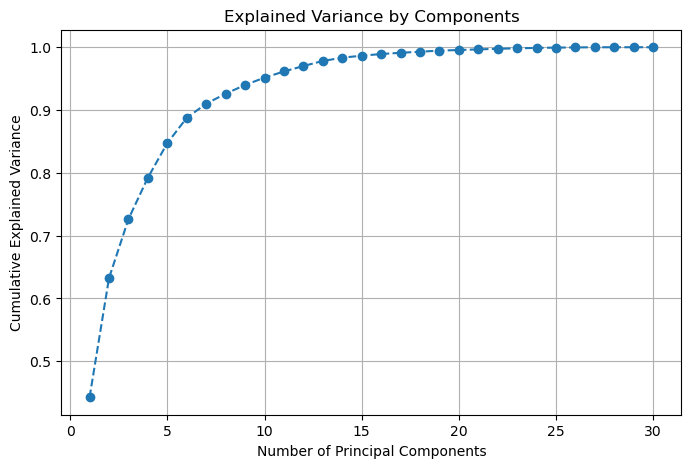

In [19]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_explained_var)+1), cum_explained_var, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

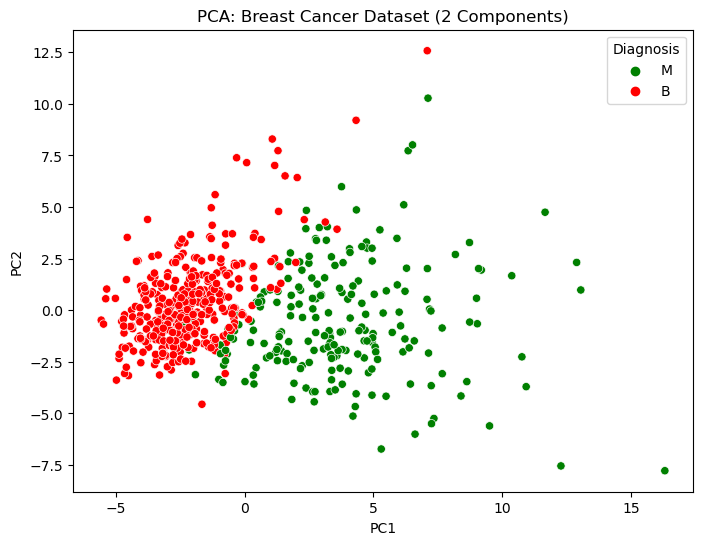

In [20]:
# Choose 2 components for visualization
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=X_pca_2, columns=['PC1', 'PC2'])
pca_df['Diagnosis'] = y

# Visualize 2D PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Diagnosis', data=pca_df, palette=['green','red'])
plt.title('PCA: Breast Cancer Dataset (2 Components)')
plt.show()

PCA + Random Forest

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("data/breast-cancer-wisconsin-data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
data.drop(['id'], axis=1, inplace=True)

# Encode target
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# 2️⃣ Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
# 3️⃣ Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 4)Apply PCA (choose components that explain ~95% variance)


In [25]:
pca = PCA(0.95)  # retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [26]:
print(f"Original feature count: {X.shape[1]}")
print(f"Reduced feature count (PCA): {pca.n_components_}")
print("\nExplained Variance Ratio per component:\n", pca.explained_variance_ratio_)

Original feature count: 30
Reduced feature count (PCA): 10

Explained Variance Ratio per component:
 [0.44593522 0.18545255 0.09584641 0.06593768 0.05622286 0.03988488
 0.02214493 0.01614006 0.01284789 0.01165661]


In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

 5️⃣ Train Random Forest on PCA data


In [28]:
y_pred = rf.predict(X_test_pca)


In [30]:
# 6️⃣ Predict and Evaluate
y_pred = rf.predict(X_test_pca)

print("\n✅ Model Evaluation on PCA Data")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Model Evaluation on PCA Data
Accuracy: 0.9474

Confusion Matrix:
 [[70  2]
 [ 4 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



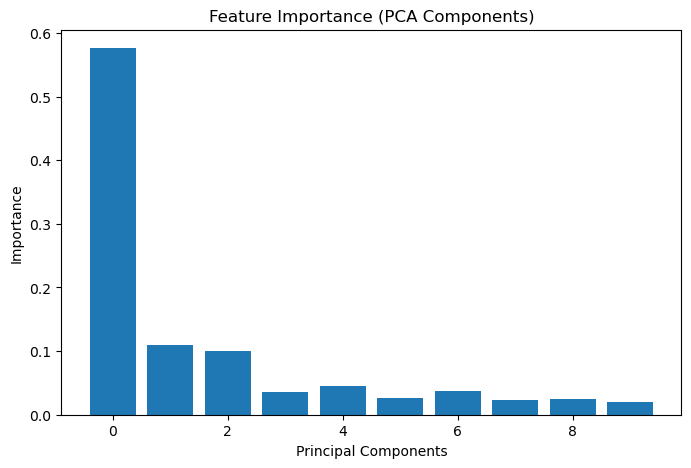

In [31]:
# 7️⃣ Optional: Plot Feature Importance (on PCA components)
importances = rf.feature_importances_
plt.figure(figsize=(8,5))
plt.bar(range(len(importances)), importances)
plt.xlabel("Principal Components")
plt.ylabel("Importance")
plt.title("Feature Importance (PCA Components)")
plt.show()

In [33]:
import time

In [35]:
#Try PCA with components from 2 to 10
results = []

for n in range(2, 11):
    # Apply PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    start = time.time()
    rf.fit(X_train_pca, y_train)
    y_pred = rf.predict(X_test_pca)
    
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    results.append({'Components': n, 'Accuracy': acc})

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nRandom Forest Accuracy with Different PCA Components (5–10):\n")
print(results_df)


Random Forest Accuracy with Different PCA Components (5–10):

   Components  Accuracy
0           2  0.956140
1           3  0.964912
2           4  0.956140
3           5  0.947368
4           6  0.947368
5           7  0.947368
6           8  0.956140
7           9  0.947368
8          10  0.947368
